In [26]:
# bagging

# load wine dataset
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['label', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 
                   'magnesium', 'total phenols', 'flavanoids', 'nonflavanoid phenols', 
                   'proanthocyanins', 'color intensity', 'hue', 
                   'OD280/OD315 of diluted wines', 'proline']
df_wine = df_wine[df_wine['label'] != 1]
y = df_wine['label'].values
X = df_wine[['alcohol', 'OD280/OD315 of diluted wines']].values
print(pd.DataFrame(X).head())

# split train test dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
print(pd.DataFrame(X_train).head())

       0     1
0  12.37  1.82
1  12.33  1.67
2  12.64  1.59
3  13.67  2.46
4  12.37  2.87
       0     1
0  12.20  1.83
1  12.33  2.31
2  12.79  1.47
3  12.84  2.15
4  11.56  3.69


In [27]:
# use bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              random_state=1, 
                              max_depth=None)
bag = BaggingClassifier(estimator=tree, 
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

In [28]:
# compare decision tree and bagging tree

# tree:
from sklearn.metrics import accuracy_score
tree.fit(X_train, y_train)
treeScore_train = tree.score(X_train, y_train)
treeScore_test = tree.score(X_test, y_test)
print('Decision Tree train/test score: %.3f/%.3f' % (treeScore_train, treeScore_test))

# bagging:
bag.fit(X_train, y_train)
bagScore_train = bag.score(X_train, y_train)
bagScore_test = bag.score(X_test, y_test)
print('Decision Tree train/test score: %.3f/%.3f' % (bagScore_train, bagScore_test))

Decision Tree train/test score: 1.000/0.833
Decision Tree train/test score: 1.000/0.917


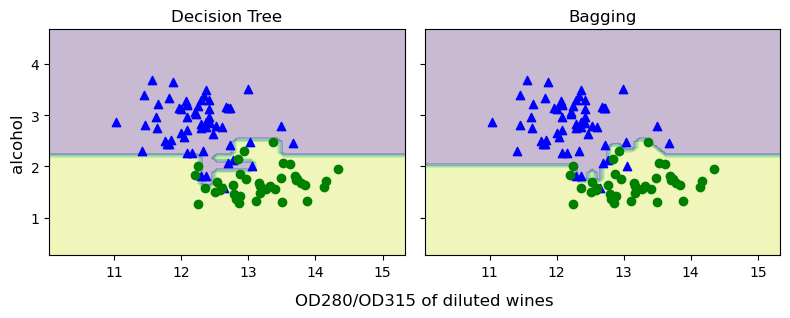

In [29]:
# visualize decision area
import numpy as np
import matplotlib.pyplot as plt
xmin = X_train[:, 0].min() - 1
xmax = X_train[:, 0].max() + 1
ymin = X_train[:, 1].min() - 1
ymax = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.1), 
                     np.arange(ymin, ymax, 0.1))
fig, ax = plt.subplots(nrows=1, ncols=2, 
                       sharex='col', 
                       sharey='row', 
                       figsize=(8, 3))
for idx, clf, name in zip([0, 1], 
                          [tree, bag], 
                          ['Decision Tree', 'Bagging']):
    clf.fit(X_train, y_train)
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    ax[idx].contourf(xx, yy, z, alpha=0.3)
    ax[idx].scatter(X_train[y_train==0, 0], 
                    X_train[y_train==0, 1], 
                    c='blue', marker='^')
    ax[idx].scatter(X_train[y_train==1, 0], 
                    X_train[y_train==1, 1], 
                    c='green', marker='o')
    ax[idx].set_title(name)
ax[0].set_ylabel('alcohol', fontsize=12)
plt.tight_layout()
plt.text(0, -0.2, 
         s='OD280/OD315 of diluted wines', 
         ha='center', 
         va='center', 
         fontsize=12, 
         transform=ax[1].transAxes)
plt.show()  # decision tree seems overfitting with strange edge